In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/Electronica Care/Desktop/Project/cleaned_sentiment_dataset.csv")



In [64]:
df.describe()



,Retweets,Likes,Year,Month,Day,Hour
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,21.542135,42.966292,2020.476124,6.108146,15.514045,15.592697
std,7.124840,14.215995,2.828326,3.406099,8.444895,4.062778
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,10.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [40]:
df["Sentiment"].value_counts()
df["Platform"].value_counts()
df["Country"].value_counts()


Country
USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Sweden              2
Portugal            2
Austria             2
Belgium             2
Denmark             2
Czech Republic      2
Jordan              1
Peru                1
Maldives            1
China               1
Cambodia            1
Norway              1
Colombia            1
Ireland             1
Jamaica             1
Kenya               1
Scotland            1
Thailand            1
Name: count, dtype: int64

In [ ]:

df["Likes"].mode()   


0    45.0
Name: Likes, dtype: float64

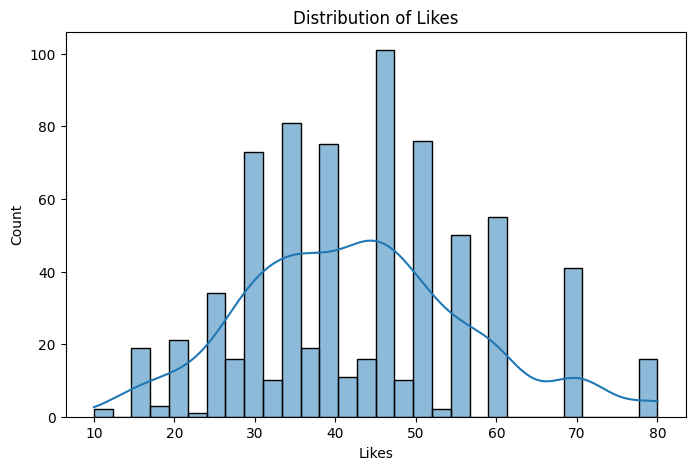

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df["Likes"], bins=30, kde=True)
plt.title("Distribution of Likes")
plt.show()


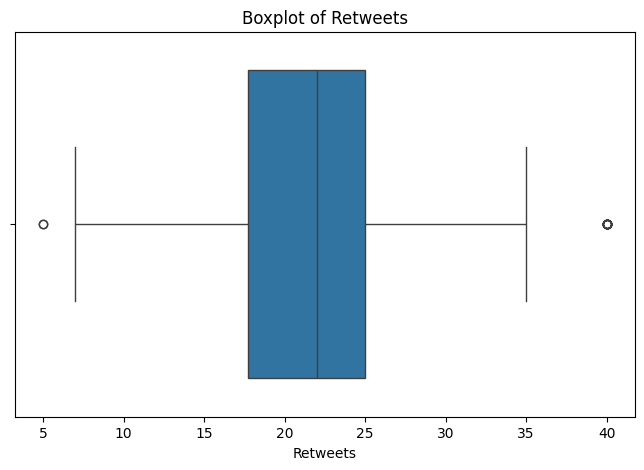

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Retweets"])
plt.title("Boxplot of Retweets")
plt.show()


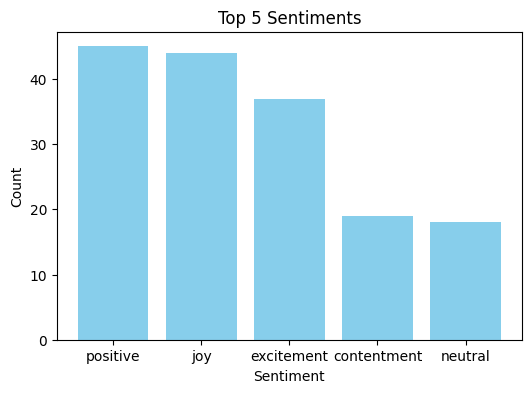

In [58]:
top5_sentiments = df["Sentiment"].value_counts().head(5)
plt.figure(figsize=(6,4))
plt.bar(top5_sentiments.index, top5_sentiments.values, color='skyblue')
plt.title("Top 5 Sentiments")
plt.ylabel("Count")
plt.xlabel("Sentiment")
plt.show()


          Retweets     Likes      Year     Month       Day      Hour
Retweets  1.000000  0.998482 -0.039982  0.073265  0.009213  0.196955
Likes     0.998482  1.000000 -0.043415  0.066643  0.011489  0.195331
Year     -0.039982 -0.043415  1.000000 -0.314845  0.021973 -0.087470
Month     0.073265  0.066643 -0.314845  1.000000 -0.135873  0.137835
Day       0.009213  0.011489  0.021973 -0.135873  1.000000  0.044072
Hour      0.196955  0.195331 -0.087470  0.137835  0.044072  1.000000


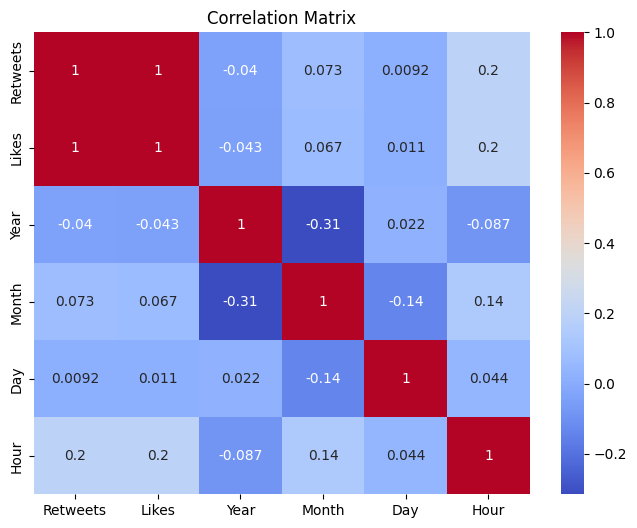

In [55]:
corr = df[["Retweets", "Likes", "Year", "Month", "Day", "Hour"]].corr()
print(corr)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


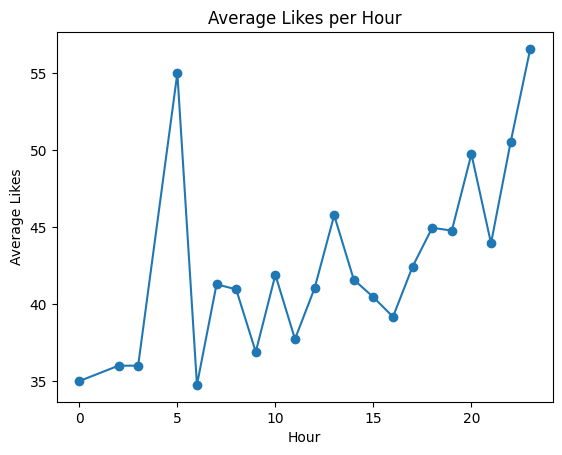

In [ ]:
hourly_likes = df.groupby("Hour")["Likes"].mean()
hourly_likes.plot(kind="line", marker="o")
plt.title("Average Likes per Hour")
plt.xlabel("Hour")
plt.ylabel("Average Likes")
plt.show()


Platform with highest average Likes: instagram (45.09 Likes)


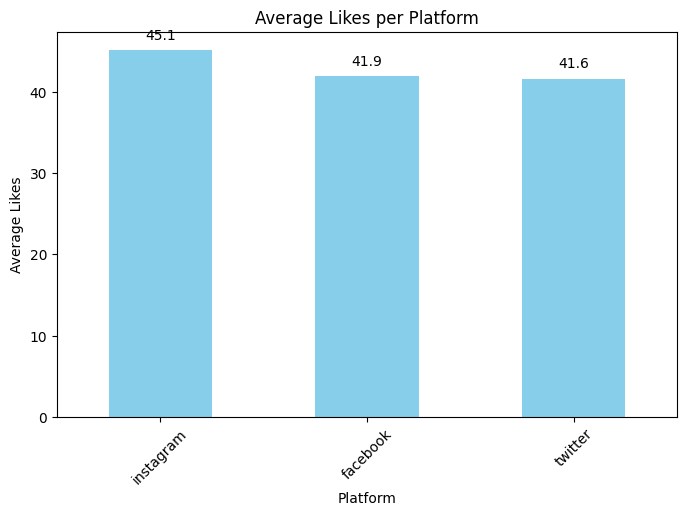

In [ ]:
platform_likes = df.groupby("Platform")["Likes"].mean().sort_values(ascending=False)

top_platform = platform_likes.idxmax()
top_likes = platform_likes.max()
print(f"Platform with highest average Likes: {top_platform} ({top_likes:.2f} Likes)")

plt.figure(figsize=(8,5))
ax = platform_likes.plot(kind="bar", color="skyblue")
plt.title("Average Likes per Platform")
plt.ylabel("Average Likes")
plt.xlabel("Platform")
plt.xticks(rotation=45)

for i, v in enumerate(platform_likes.values):
    ax.text(i, v + 1, f"{v:.1f}", ha='center', va='bottom') 

plt.show()
